In [18]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #for heatmaps

In [19]:
data = pd.read_csv('radar.csv')
column_names = data.columns.to_numpy()
column_names = column_names[1:]
def _df(data):
    df = pd.DataFrame(data)
    for c in range(df.shape[1]):
        mapping = {df.columns[c]: c}
        df = df.rename(columns=mapping)
    return df

data = data.drop(columns = ["Emitter"])
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [22]:
import logging
import numpy as np
import pandas as pd
import tensorflow as tf

tf.get_logger().setLevel(logging.ERROR)

dloss = []
gloss = []
class Gan():

    def __init__(self, data):


        self.data = data
        self.n_epochs = 1000

    def _noise(self):
        noise = np.random.normal(0, 1, self.data.shape)
        return noise

    def _generator(self):
        model = tf.keras.Sequential(name="Generator_model")
        model.add(tf.keras.layers.Dense(self.data.shape[1], activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(30, activation='relu'))
        model.add(tf.keras.layers.Dense(self.data.shape[1], activation='linear'))
        return model

    def _discriminator(self):
        model = tf.keras.Sequential(name="Discriminator_model")
        model.add(tf.keras.layers.Dense(self.data.shape[1], activation='relu',
                                        kernel_initializer='he_uniform',
                                        input_dim=self.data.shape[1]))
        model.add(tf.keras.layers.Dense(50, activation='relu'))
        # sigmoid => real or fake
        model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

        return model

    def _GAN(self, generator, discriminator):
        discriminator.trainable = False
        generator.trainable = True
        model = tf.keras.Sequential(name="GAN")
        model.add(generator)
        model.add(discriminator)
        model.compile(loss='binary_crossentropy', optimizer='adam')
        return model


    def train(self, generator, discriminator, gan):
        for epoch in range(self.n_epochs):
            generated_data = generator.predict(self._noise())
            labels = np.concatenate([np.ones(self.data.shape[0]), np.zeros(self.data.shape[0])])
            X = np.concatenate([self.data, generated_data])
            discriminator.trainable = True
            d_loss , _ = discriminator.train_on_batch(X, labels)

            noise = self._noise()
            g_loss = gan.train_on_batch(noise, np.ones(self.data.shape[0]))
            dloss.append(d_loss)
            gloss.append(g_loss)

            print('>%d, d1=%.3f, d2=%.3f' %(epoch+1, d_loss, g_loss))


        return generator, dloss, gloss

In [23]:
model = Gan(data=data)
generator = model._generator()
descriminator = model._discriminator()
gan_model = model._GAN(generator=generator, discriminator=descriminator)
trained_model, dloss, gloss = model.train(
    generator=generator, discriminator=descriminator, gan=gan_model)

4/4 [==============================] - 0s 4ms/step
>1, d1=0.744, d2=0.589
4/4 [==============================] - 0s 4ms/step
>2, d1=0.752, d2=0.591
4/4 [==============================] - 0s 5ms/step
>3, d1=0.749, d2=0.567
4/4 [==============================] - 0s 6ms/step
>4, d1=0.753, d2=0.584
4/4 [==============================] - 0s 6ms/step
>5, d1=0.736, d2=0.602
4/4 [==============================] - 0s 5ms/step
>6, d1=0.731, d2=0.567
4/4 [==============================] - 0s 3ms/step
>7, d1=0.742, d2=0.578
4/4 [==============================] - 0s 4ms/step
>8, d1=0.725, d2=0.560
4/4 [==============================] - 0s 3ms/step
>9, d1=0.722, d2=0.581
4/4 [==============================] - 0s 4ms/step
>10, d1=0.714, d2=0.570
4/4 [==============================] - 0s 6ms/step
>11, d1=0.721, d2=0.560
4/4 [==============================] - 0s 4ms/step
>12, d1=0.719, d2=0.571
4/4 [==============================] - 0s 5ms/step
>13, d1=0.718, d2=0.571
4/4 [=============================

In [24]:
noise = np.random.normal(0, 1, data.shape)
new_data = _df(data=trained_model.predict(noise))
original_data = scaler.inverse_transform(new_data)
print(type(original_data))
print(original_data.shape)

4/4 [==============================] - 0s 4ms/step
<class 'numpy.ndarray'>
(100, 12)


In [25]:
original_data_array = np.array(original_data)
original_data_df = pd.DataFrame(original_data_array, columns=column_names)
original_data_df.to_csv('synthetic.csv', index=False)

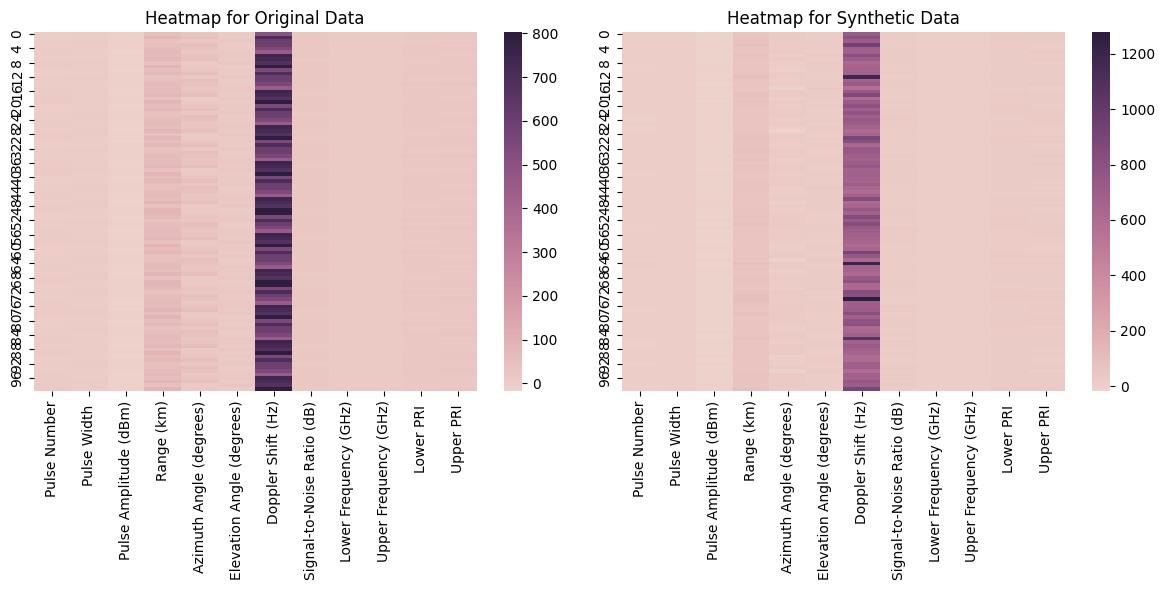

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
p1 = pd.read_csv('radar.csv')
p1 = p1.drop(columns = ["Emitter"])
sns.heatmap(p1, cmap=sns.cubehelix_palette(as_cmap=True), ax=axes[0])
axes[0].set_title('Heatmap for Original Data')
sns.heatmap(original_data_df, cmap=sns.cubehelix_palette(as_cmap=True), ax=axes[1])
axes[1].set_title('Heatmap for Synthetic Data')
plt.tight_layout()
plt.show()

In [27]:
print(min(p1['Range (km)']))
print(max(p1['Range (km)']))

38.5
85.7


In [28]:
cols = p1.columns.tolist()
cols = cols[2:]
cols

['Pulse Amplitude (dBm)',
 'Range (km)',
 'Azimuth Angle (degrees)',
 'Elevation Angle (degrees)',
 'Doppler Shift (Hz)',
 'Signal-to-Noise Ratio (dB)',
 'Lower Frequency (GHz)',
 'Upper Frequency (GHz)',
 'Lower PRI ',
 'Upper PRI ']

**Evaluation - Heatmaps and Heatmaps for each parameter**

In [29]:
radar = pd.read_csv('radar.csv')
radar = radar.drop("Emitter", axis='columns')
syn = pd.read_csv('synthetic.csv')

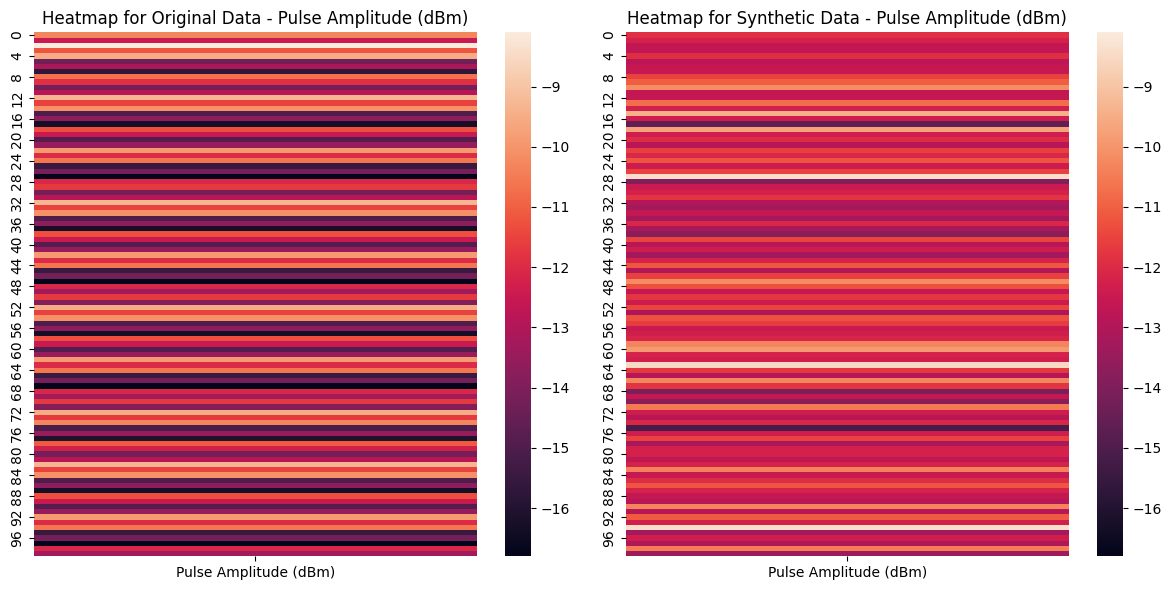

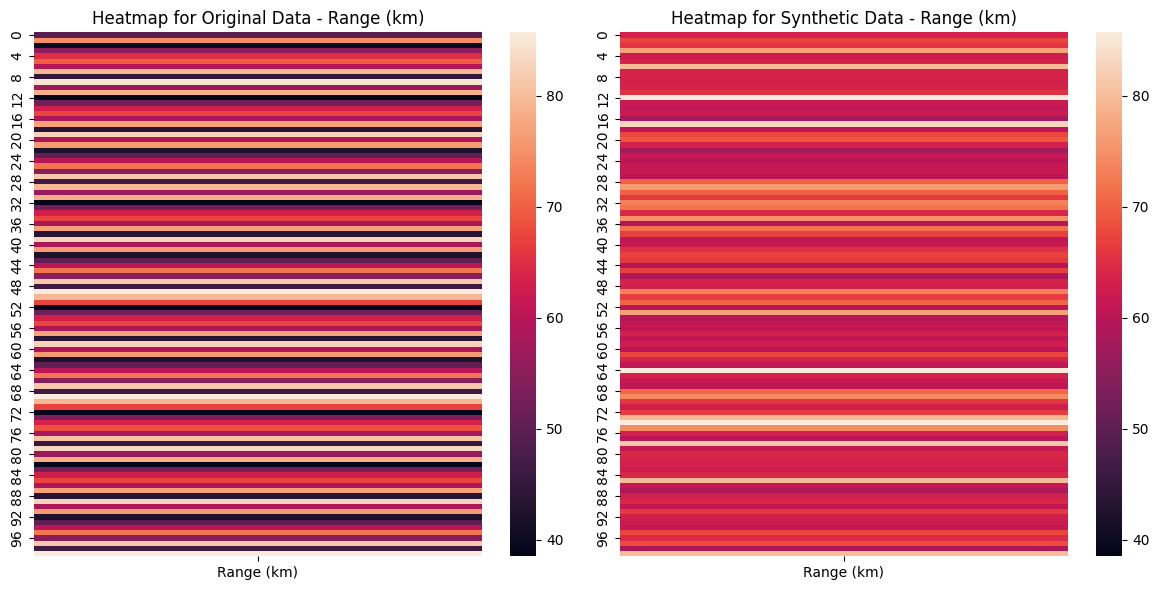

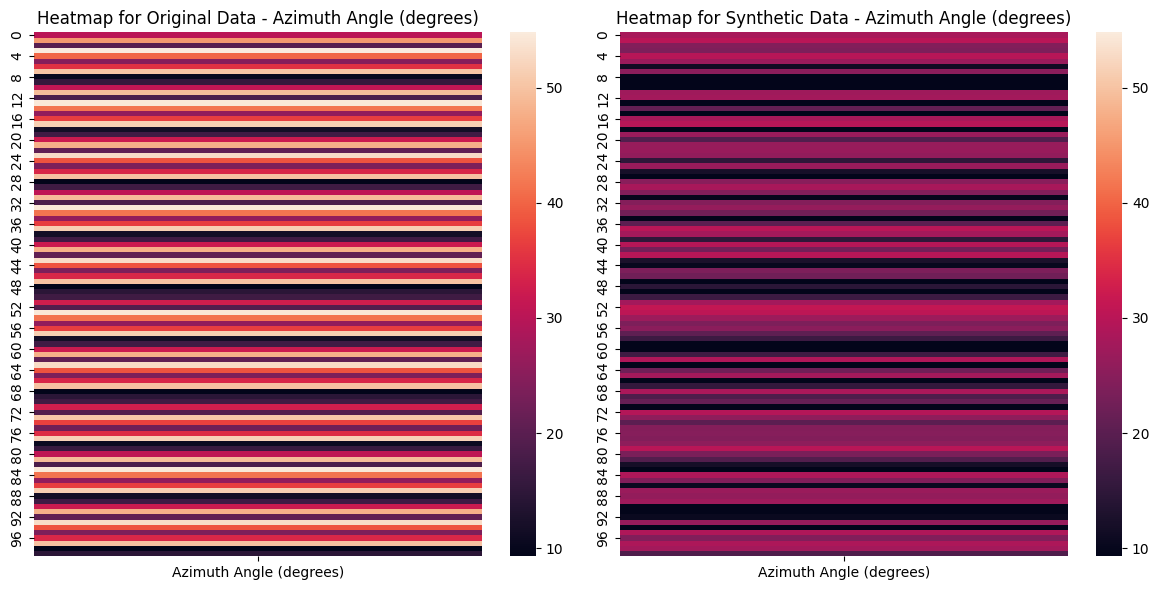

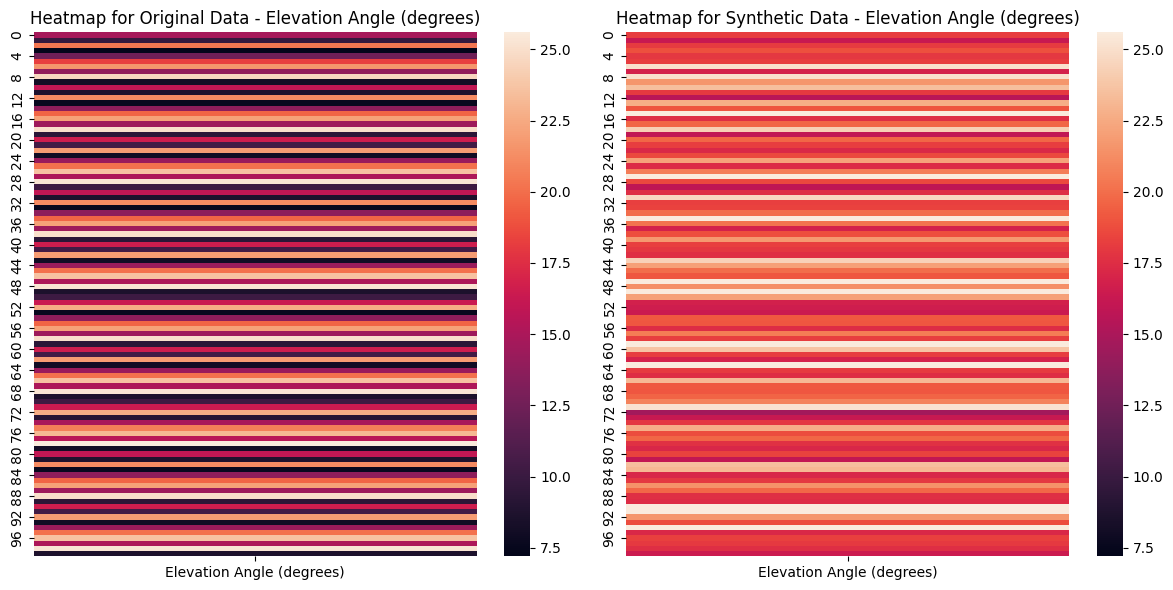

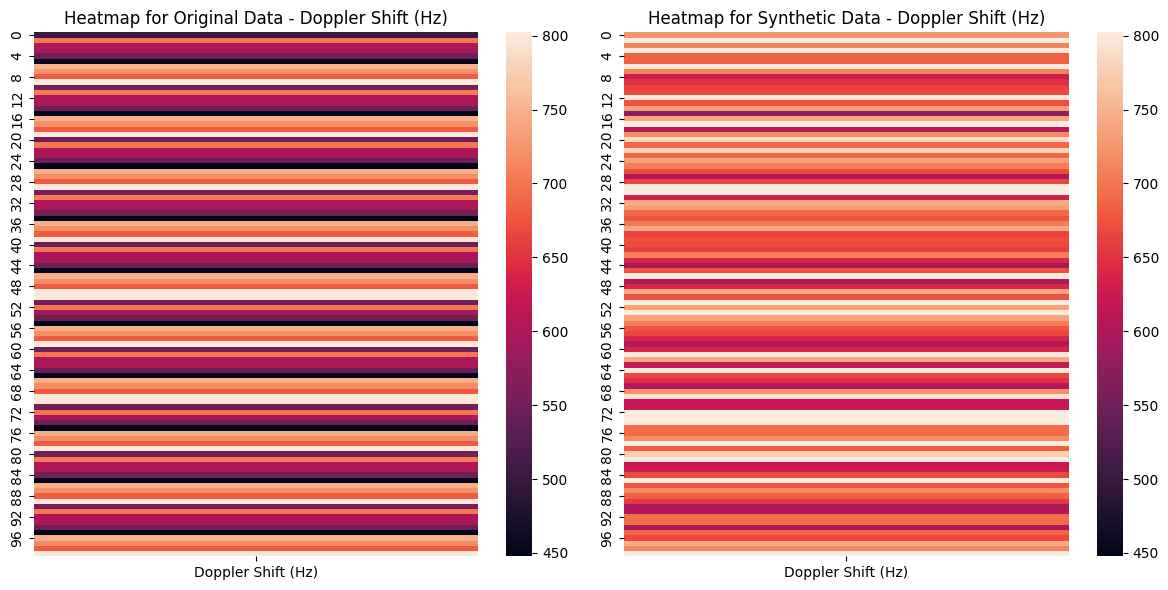

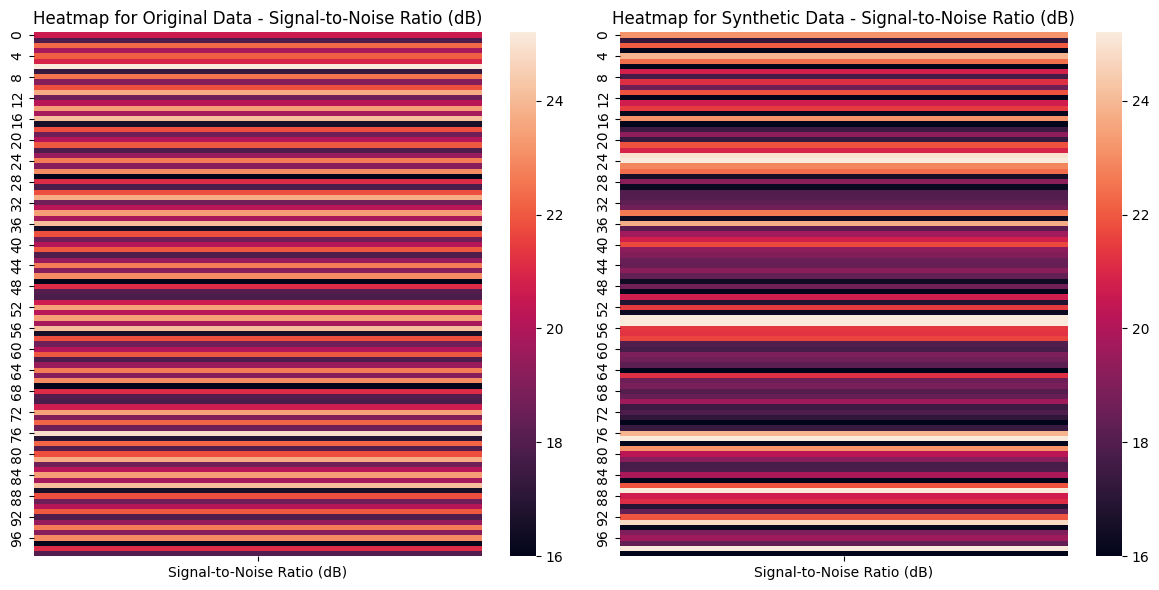

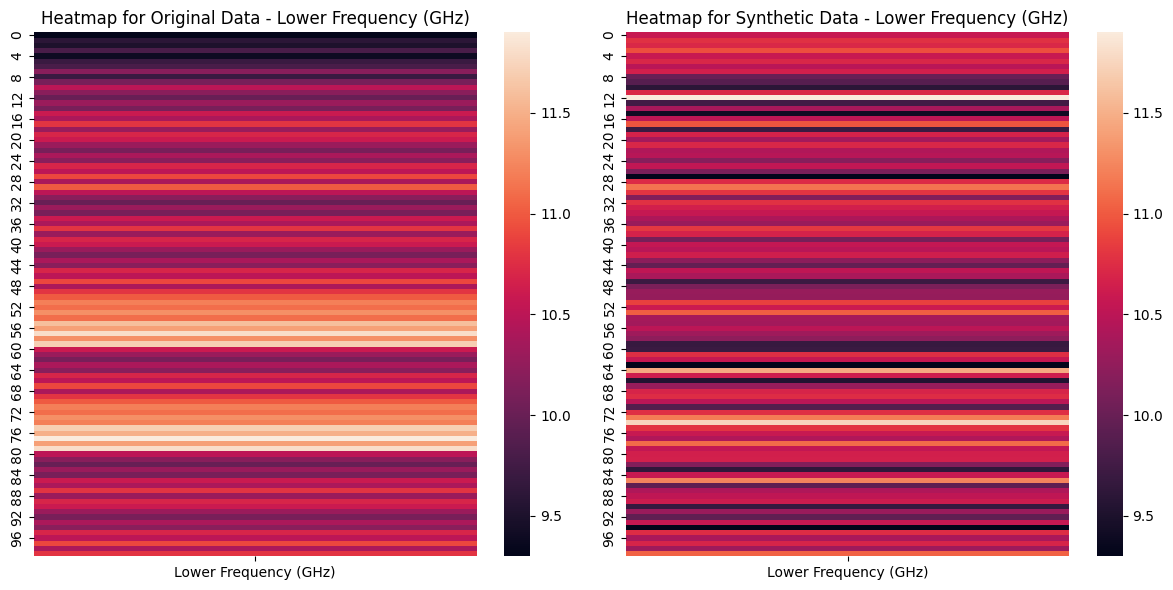

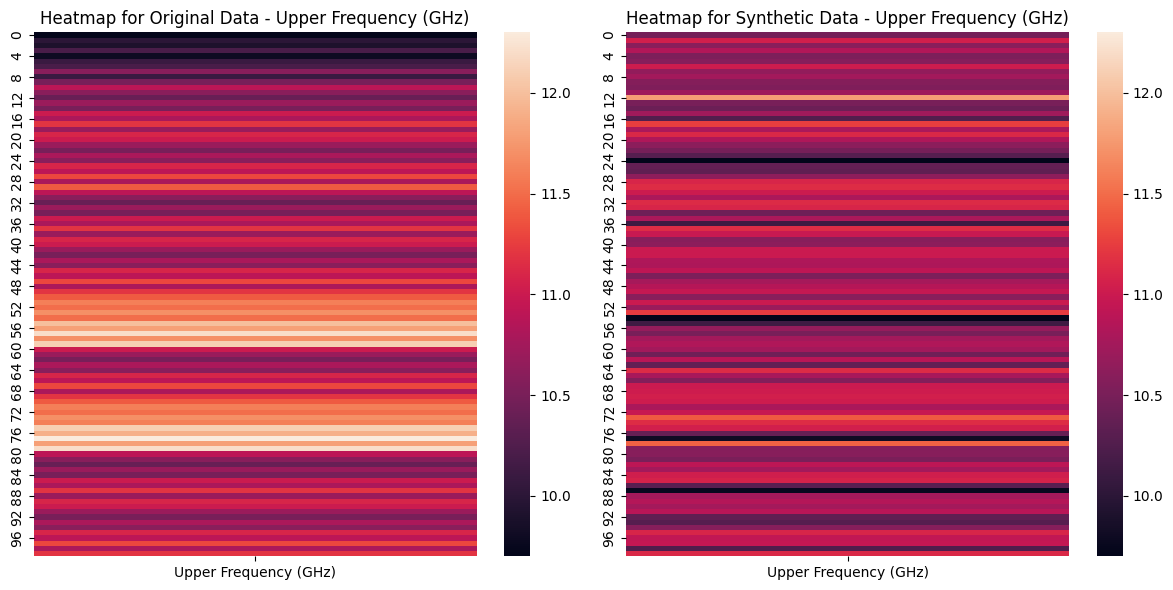

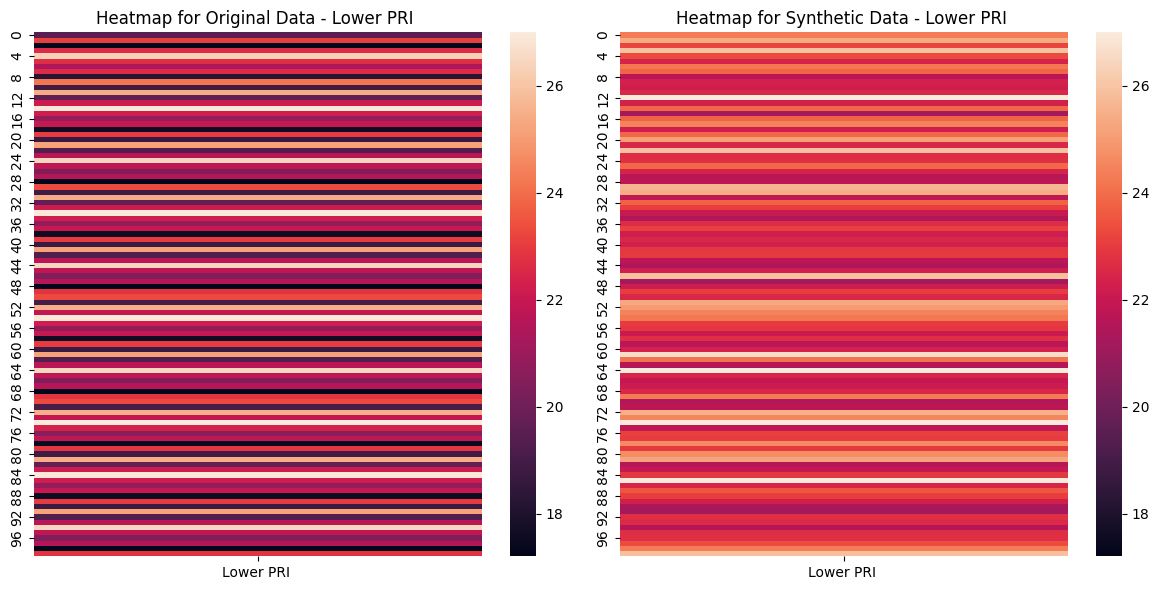

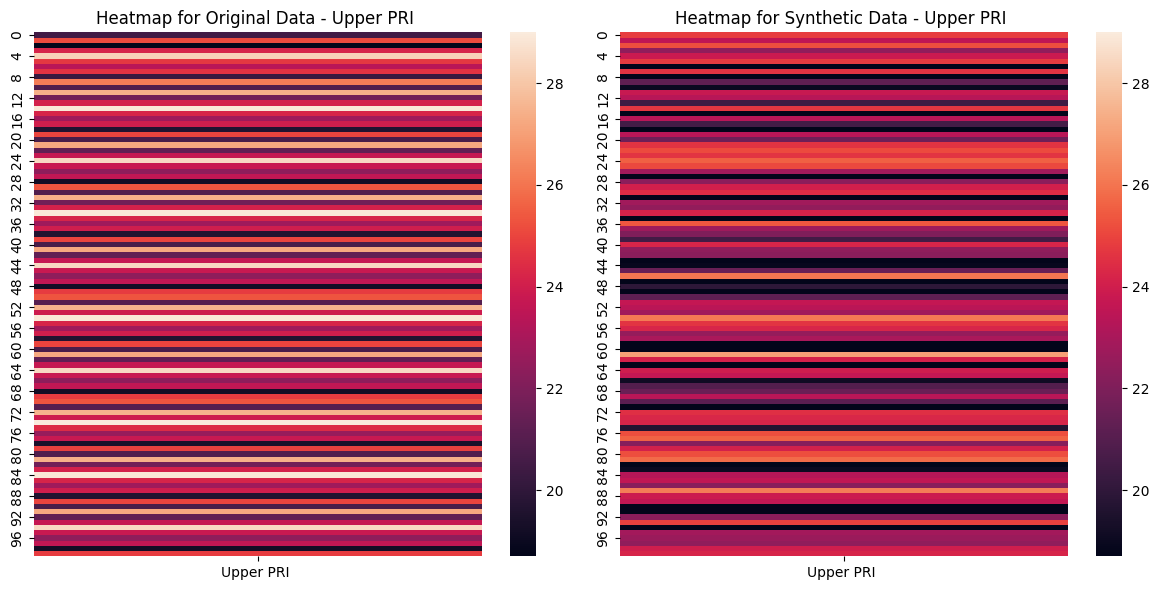

In [30]:
for param in cols:
  z1 = min(radar[f'{param}'])
  z2 = max(radar[f'{param}'])

  temp1 = radar
  temp2 = syn
  user_specified_col = f'{param}'
  columns1_to_drop = temp1.columns.difference([user_specified_col])
  df1_result = temp1.drop(columns=columns1_to_drop)
  columns2_to_drop = temp2.columns.difference([user_specified_col])
  df2_result = temp2.drop(columns=columns2_to_drop)

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  sns.heatmap(df1_result, vmin=z1, vmax=z2, ax = axes[0])
  axes[0].set_title(f'Heatmap for Original Data - {user_specified_col}')
  sns.heatmap(df2_result, vmin=z1, vmax=z2, ax = axes[1])
  axes[1].set_title(f'Heatmap for Synthetic Data - {user_specified_col}')
  plt.tight_layout()
  plt.show()

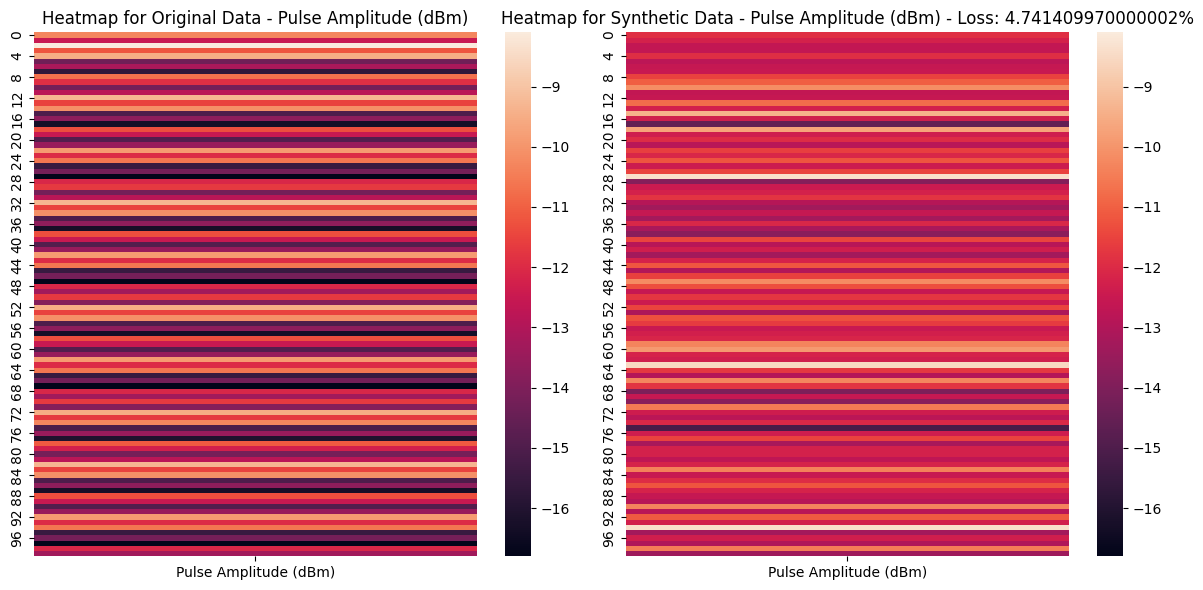

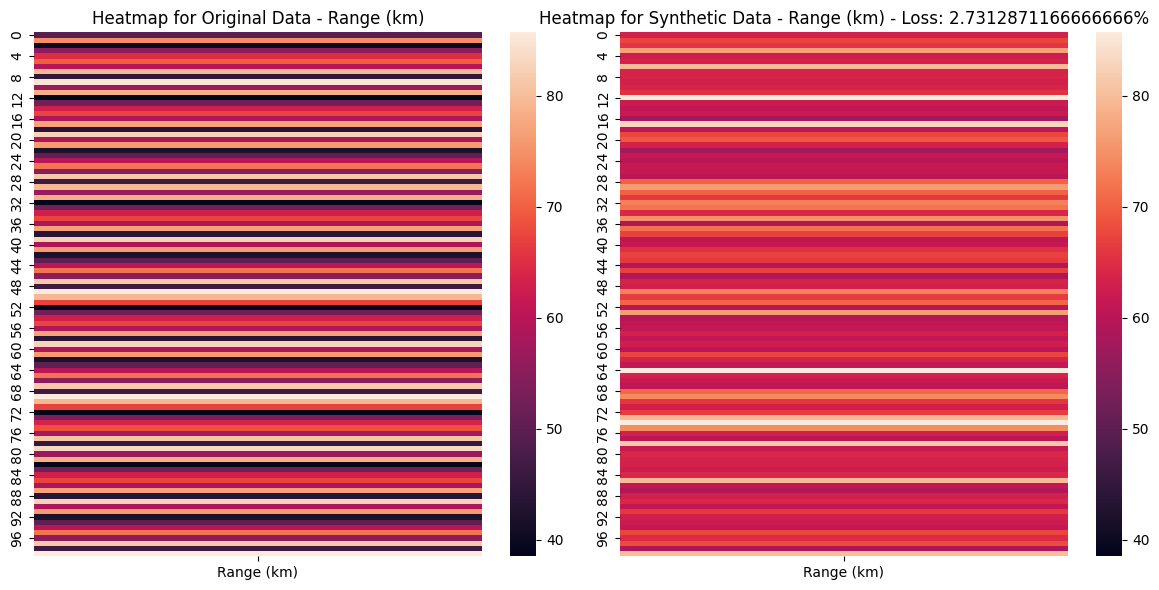

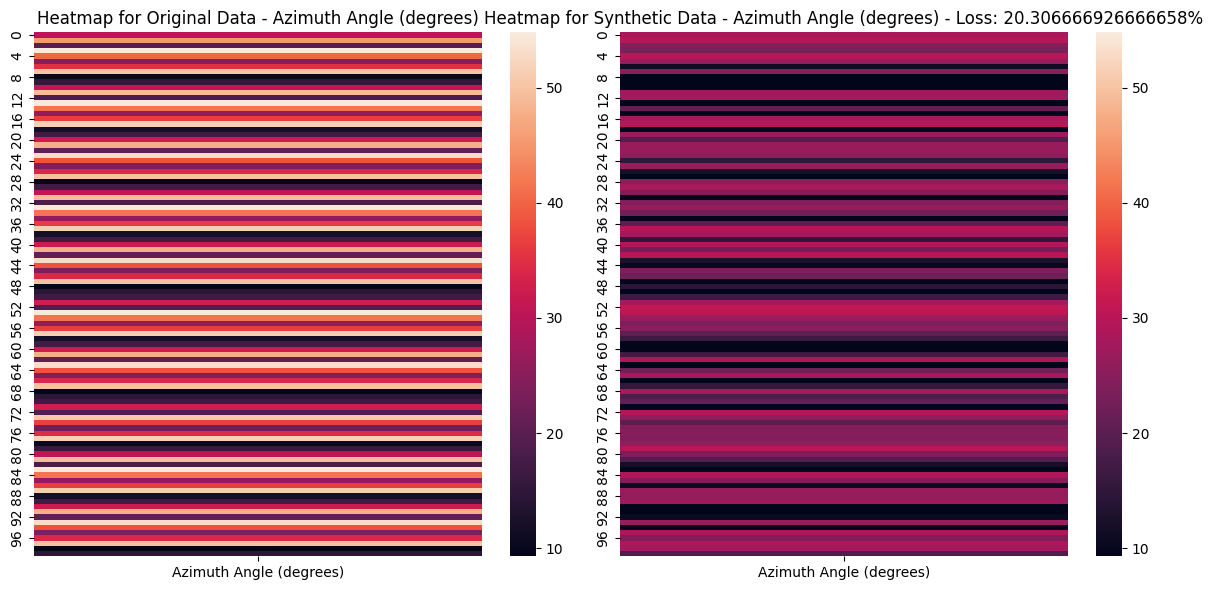

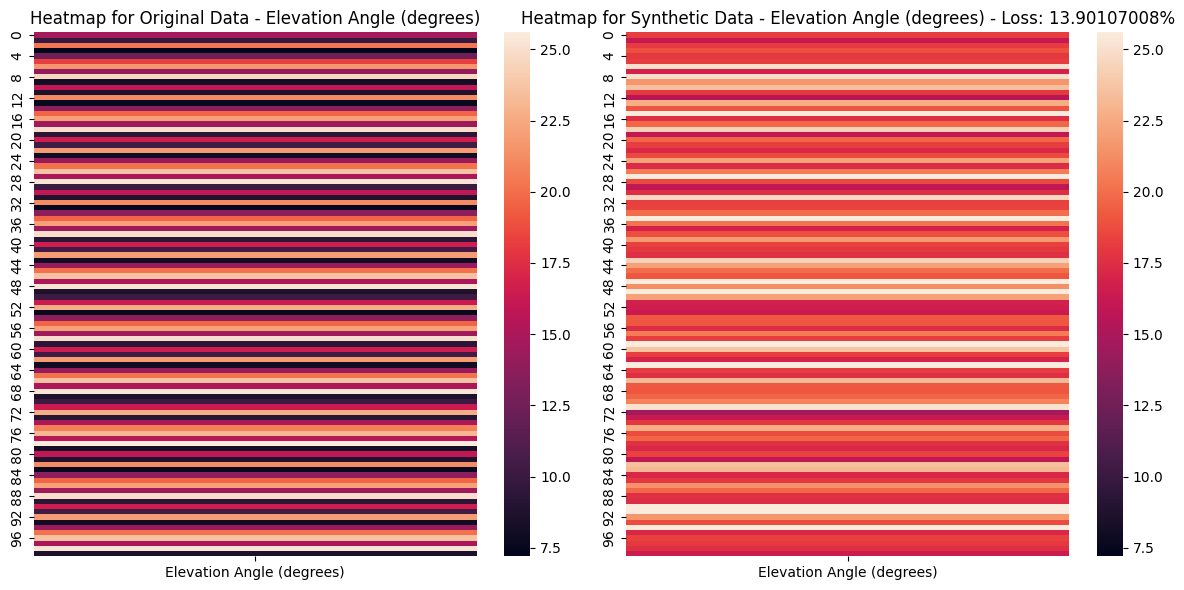

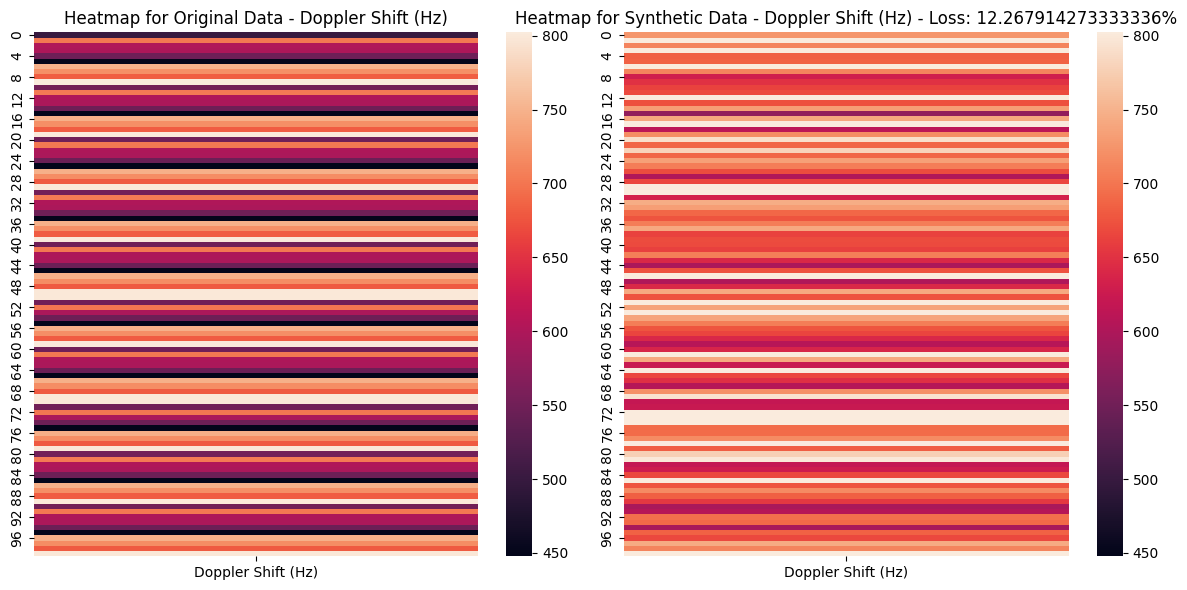

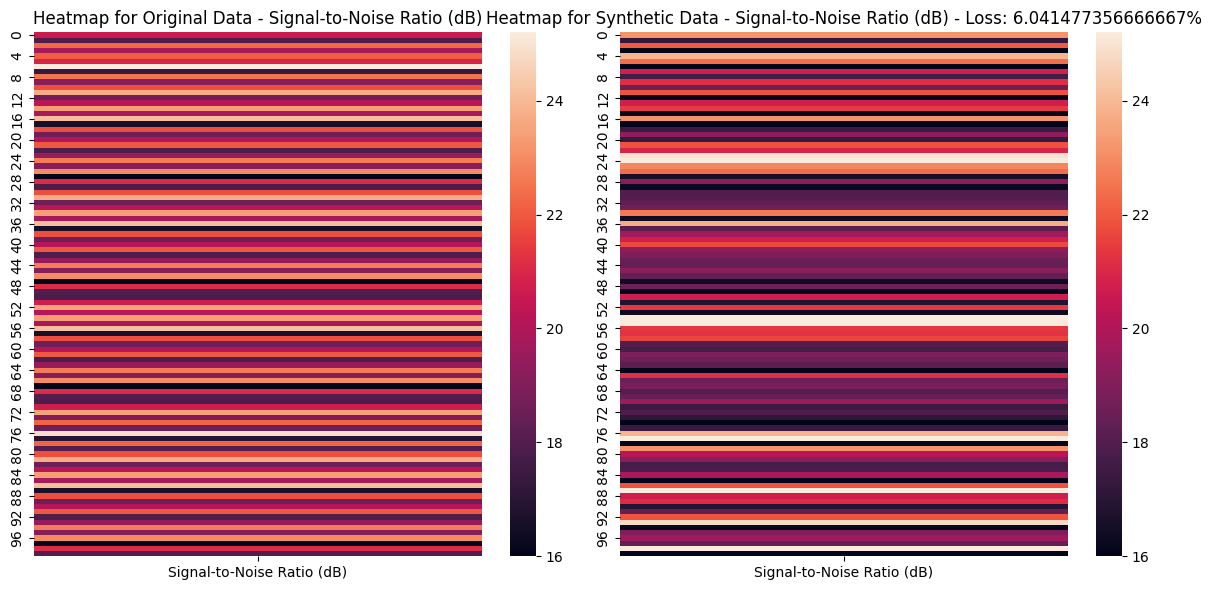

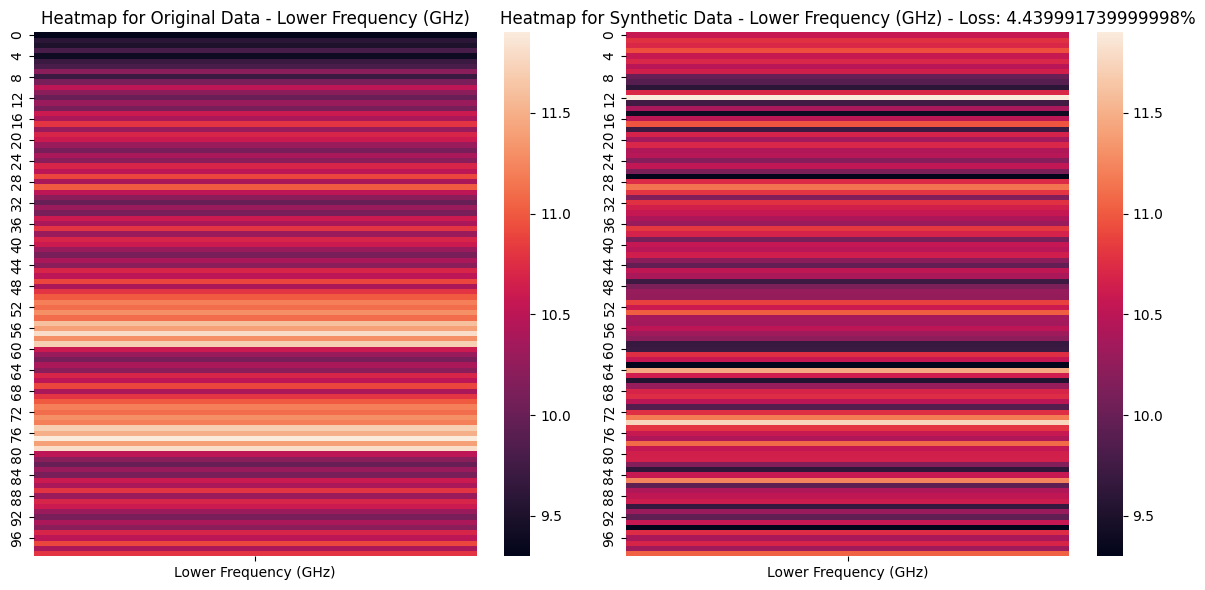

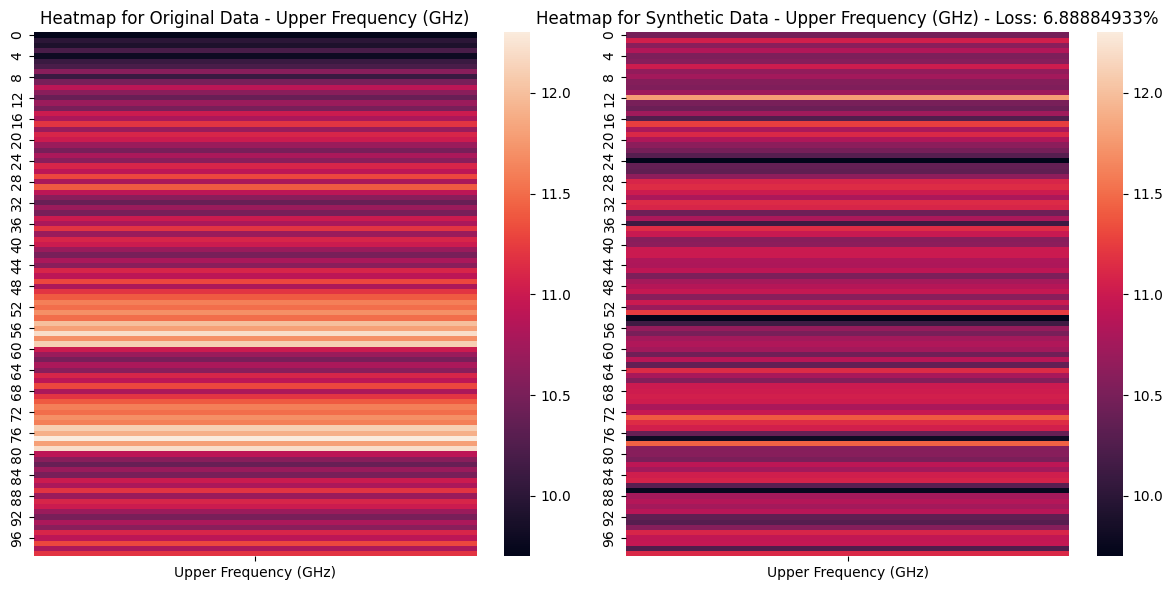

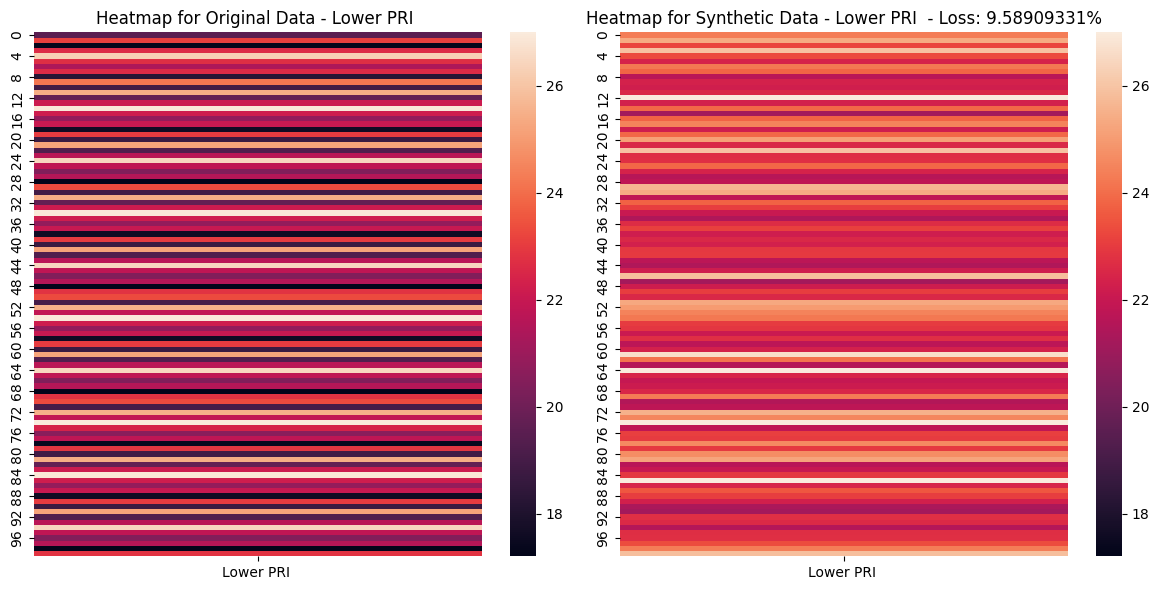

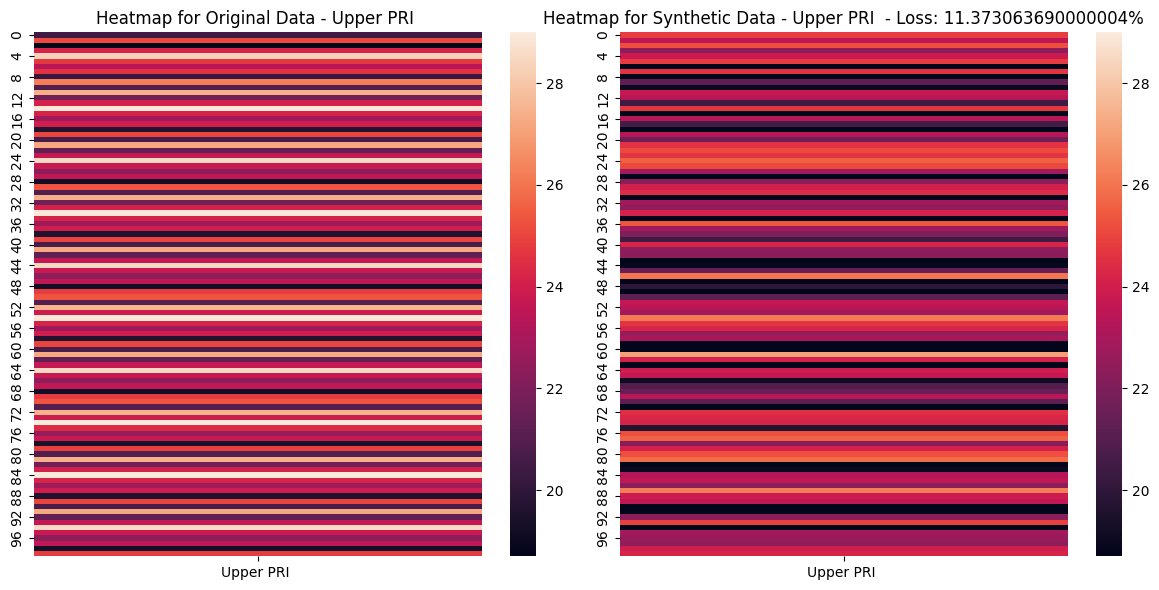

In [41]:
for param in cols:
    z1 = min(radar[param])
    z2 = max(radar[param])

    temp1 = radar
    temp2 = syn
    user_specified_col = param

    columns1_to_drop = temp1.columns.difference([user_specified_col])
    df1_result = temp1.drop(columns=columns1_to_drop)

    columns2_to_drop = temp2.columns.difference([user_specified_col])
    df2_result = temp2.drop(columns=columns2_to_drop)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Create the heatmap for Original Data
    ax1 = sns.heatmap(df1_result, vmin=z1, vmax=z2, ax=axes[0])
    ax1.set_title(f'Heatmap for Original Data - {user_specified_col}')

    # Create the heatmap for Synthetic Data
    ax2 = sns.heatmap(df2_result, vmin=z1, vmax=z2, ax=axes[1])
    # ax2.set_title(f'Heatmap for Synthetic Data - {user_specified_col}')
    colors1 = ax1.collections[0].get_facecolor()
    colors2 = ax2.collections[0].get_facecolor()

    # print("original: ",colors1)
    # print("synthetic: ",colors2)
    diff_array = []
    for i in range(min(len(colors1), len(colors2))):
      d = 0
      for j in range(3):
        diff = colors1[i][j] - colors2[i][j]
        d += diff
      diff_array.append(d/3)
    diffyes = sum(diff_array)/len(diff_array)
    ax2.set_title(f'Heatmap for Synthetic Data - {user_specified_col} - Loss: {abs(diffyes)*100}%')

    plt.tight_layout()
    plt.show()